In [115]:
#NEURAL NETWORK
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(16))
model.add(keras.layers.Dense(16))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Dense(1))  # Output layer for regression
model.summary()

def r2_metric(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

model.compile(loss='mean_squared_error',optimizer='adam',metrics=[r2_metric])
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Set:", loss)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,939 (11.48 KB)

 Trainable params: 2,939 (11.48 KB)

 Non-trainable params: 0 (0.00 B)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0399 - r2_metric: -0.1142  
Mean Squared Error on Test Set: [0.83792644739151, -0.20005474984645844]


In [116]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [120]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[es, sm])

Epoch 1/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6934 - val_loss: 0.6785
Epoch 2/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2414 - val_loss: 0.6688
Epoch 3/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5218 - val_loss: 0.6987
Epoch 4/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6680 - val_loss: 0.6725
Epoch 5/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6317 - val_loss: 0.6983
Epoch 6/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8755 - val_loss: 0.6854
Epoch 7/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7810 - val_loss: 0.6885
Epoch 8/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6307 - val_loss: 0.7340
Epoch 9/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6794 - val_loss: 0.7253
Epoch 10/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0261 - val_loss: 0.7048
Epoch 11/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0292 - val_loss: 0.6970
Epoch 12/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [121]:
es = keras.callbacks.EarlyStopping(monitor='loss' , patience=10, restore_best_weights=True)
sm =keras.callbacks.ModelCheckpoint("/content/dnn.keras", monitor='val_loss') # Change the file extension to '.keras'

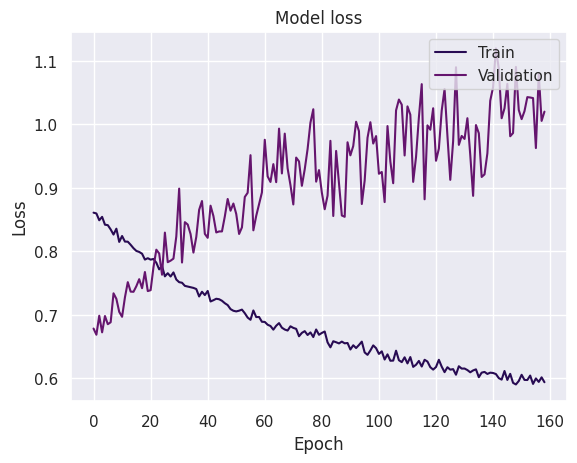

In [122]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [123]:
# ,callbacks=[es,sm]
history = model.fit(X_train, y_train, epochs=10,callbacks=[es,sm])
test_loss= model.evaluate(X_test,y_test)
print(test_loss)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5339
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4653
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4240
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5913
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6126
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5289
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4552
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4658
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4881
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5463
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3218 
1.090325951576233


In [126]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [127]:

import keras_tuner

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Int('units_input', min_value=32, max_value=512, step=32),
      activation='relu',
      input_dim=X_train.shape[1]
  ))
  for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
    model.add(keras.layers.Dense(
        hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
  model.add(keras.layers.Dense(1, activation='linear'))
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')
      ),
      loss='mean_squared_error',
      metrics=['mean_squared_error']
  )
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld'
)

tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Train the best model
history1 = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 19s]
val_mean_squared_error: 0.6756578087806702

Best val_mean_squared_error So Far: 0.6657668749491373
Total elapsed time: 00h 02m 34s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.0949 - mean_squared_error: 1.0949 - val_loss: 0.7233 - val_mean_squared_error: 0.7233
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1295 - mean_squared_error: 1.1295 - val_loss: 0.6876 - val_mean_squared_error: 0.6876
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4116 - mean_squared_error: 1.4116 - val_loss: 0.6724 - val_mean_squared_error: 0.6724
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8472 - mean_squared_error: 0.8472 - val_loss: 0.6791 - val_mean_squared_error: 0.6791
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1673 - mean_squared_error: 1.1673 - val_loss: 0.7421 - val_mean_squared_error: 0.7421
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6930 - mean_squared_error: 0.6930 - val_loss: 0

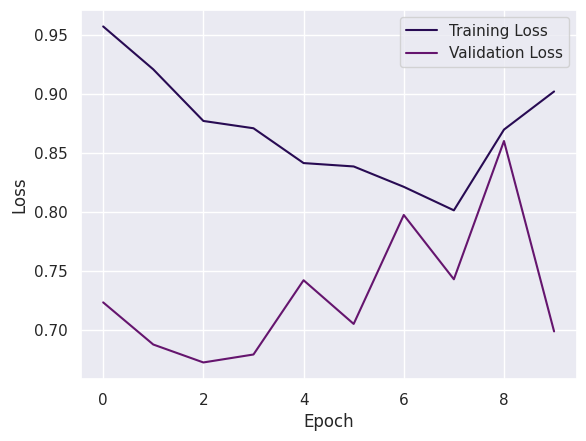

In [128]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
